# Global Power Plant Database


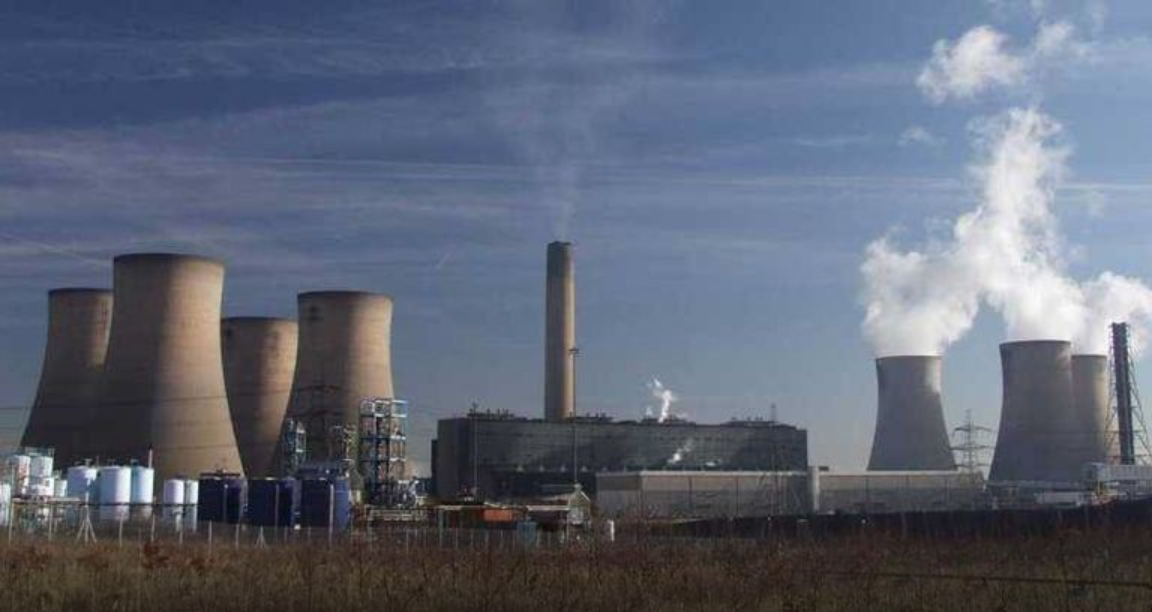

# AIM: Make two Predictio: 1. Primary Fuel, 2. Capacity_mw

## Problem Statement:

###### The Global Power Plant Database is a comprehensive, open source database of power plants around the world.

It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis.

The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type.

It will be continuously updated as data becomes available.

###### The database includes the following indicators:



`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
    
`country_long` (text): longer form of the country designation
    
`name` (text): name or title of the power plant, generally in Romanized form
    
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
    
`capacity_mw` (number): electrical generating capacity in megawatts
    
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    
`primary_fuel` (text): energy source used in primary electricity generation or export
    
`other_fuel1` (text): energy source used in electricity generation or export
    
`other_fuel2` (text): energy source used in electricity generation or export
    
`other_fuel3` (text): energy source used in electricity generation or export
    
`commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
    
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
    
`geolocation_source` (text): attribution for geolocation information
    
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
    
`year_of_capacity_data` (number): year the capacity information was reported
    
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
    
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
    
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
    
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
    
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
    
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
    
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
    
`generation_data_source` (text): attribution for the reported generation information
    
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
    
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014
    
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015
    
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016
    
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
    
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
    
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
    
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
    
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation


We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Find the dataset link below. 

Downlaod Files:
https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

In [220]:
!pip install imbalanced-learn

In [221]:
##Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import pickle
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [222]:
data=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [223]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [224]:
data.shape

(907, 27)

In [225]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

These below mentioned columns are either empty or has no impact for prediction based on our first level analysis so i am droping the columns

other_fuel2 other_fuel3 wepp_id generation_gwh_2013 generation_gwh_2019 estimated_generation_gwh latitude longitude country_long gppd_idnr commissioning_year owner url year_of_capacity_data generation_data_source

removing country and country_long because it has only one entry which is IND&India

In [226]:
col=data[['other_fuel2', 'other_fuel3', 'wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','latitude','longitude','country_long','gppd_idnr','commissioning_year','owner','url','country','year_of_capacity_data','generation_data_source']]

In [227]:
data = data.drop(columns=col,axis=1)
data.shape

(907, 11)

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    object 
 1   capacity_mw          907 non-null    float64
 2   primary_fuel         907 non-null    object 
 3   other_fuel1          198 non-null    object 
 4   source               907 non-null    object 
 5   geolocation_source   888 non-null    object 
 6   generation_gwh_2014  398 non-null    float64
 7   generation_gwh_2015  422 non-null    float64
 8   generation_gwh_2016  434 non-null    float64
 9   generation_gwh_2017  440 non-null    float64
 10  generation_gwh_2018  448 non-null    float64
dtypes: float64(6), object(5)
memory usage: 78.1+ KB


We have dropped unnecessary features now we have to treat NAN's by following ways


other_fuel1 - median


geolocation_source - median


generation_gwh_2014 - mean


generation_gwh_2015 - mean


generation_gwh_2016 - mean


generation_gwh_2017 - mean

generation_gwh_2018 - mean

In [229]:
#Lets fill NaN's:


data['other_fuel1'].fillna(data['other_fuel1'].mode()[0],inplace=True)
data['geolocation_source'].fillna(data['geolocation_source'].mode()[0],inplace=True)
data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].median(),inplace=True)
data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].median(),inplace=True)
data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].median(),inplace=True)
data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].median(),inplace=True)
data['generation_gwh_2018'].fillna(data['generation_gwh_2018'].median(),inplace=True)






In [230]:
data.isna().sum()

name                   0
capacity_mw            0
primary_fuel           0
other_fuel1            0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [231]:
print('Shape',data.shape)
print('_______________________________________________________________________________________________________________')
data.describe()

Shape (907, 11)
_______________________________________________________________________________________________________________


,capacity_mw,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030
std,590.085456,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,801.123775,711.181225,737.205450,817.977250,751.644375
50%,59.200000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,801.123775,711.181225,737.205450,817.977250,751.644375
max,4760.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [232]:
data

,name,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,ADITYA CEMENT WORKS,98.0,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,AES Saurashtra Windfarms,39.2,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,AGARTALA GT,135.0,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,Coal,Oil,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,3.0,Solar,Oil,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375
904,Yelisirur wind power project,25.5,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
905,ZAWAR MINES,80.0,Coal,Oil,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375


In [233]:
numerics = ['int8','int16','int32','int64','float32','float64']
categorical_columns = []
features=data.columns.values.tolist()

for col in features:
    if data[col].dtypes in numerics:
        continue
    data[col] = LabelEncoder().fit_transform(data[col])
    
data

,name,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,1,98.0,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,2,39.2,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,3,135.0,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,4,1800.0,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,902,1600.0,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000
903,903,3.0,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375
904,904,25.5,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
905,905,80.0,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375


In [234]:
#checking and removing if there is any duplicate entry present in the dataset

data.drop_duplicates(inplace=True)
data.shape

(907, 11)

No duplicate records founds

In [235]:
#Checking for Multicollinearity using VIF

w = data[list(data.columns)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(w.values, i) for i in range(w.shape[1])]
vif_info['Column'] = w.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
9,67.701482,generation_gwh_2017
10,55.959972,generation_gwh_2018
8,55.957886,generation_gwh_2016
7,43.130115,generation_gwh_2015
3,33.013445,other_fuel1
6,18.419280,generation_gwh_2014
5,13.841509,geolocation_source
1,7.249536,capacity_mw
2,4.900653,primary_fuel
0,4.037708,name


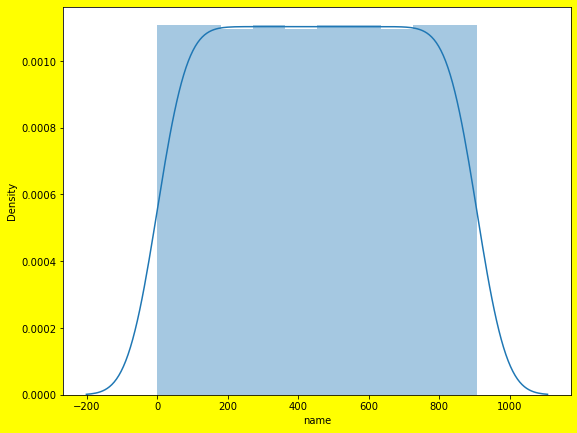

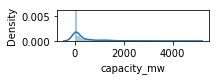

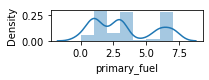

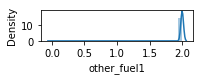

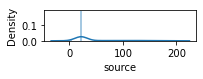

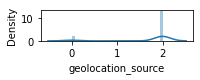

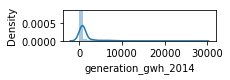

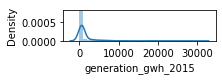

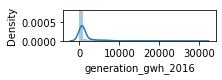

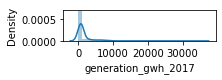

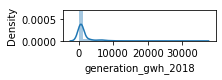

In [236]:
plt.figure(figsize=(20,50),facecolor="yellow")
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
    plt.show()

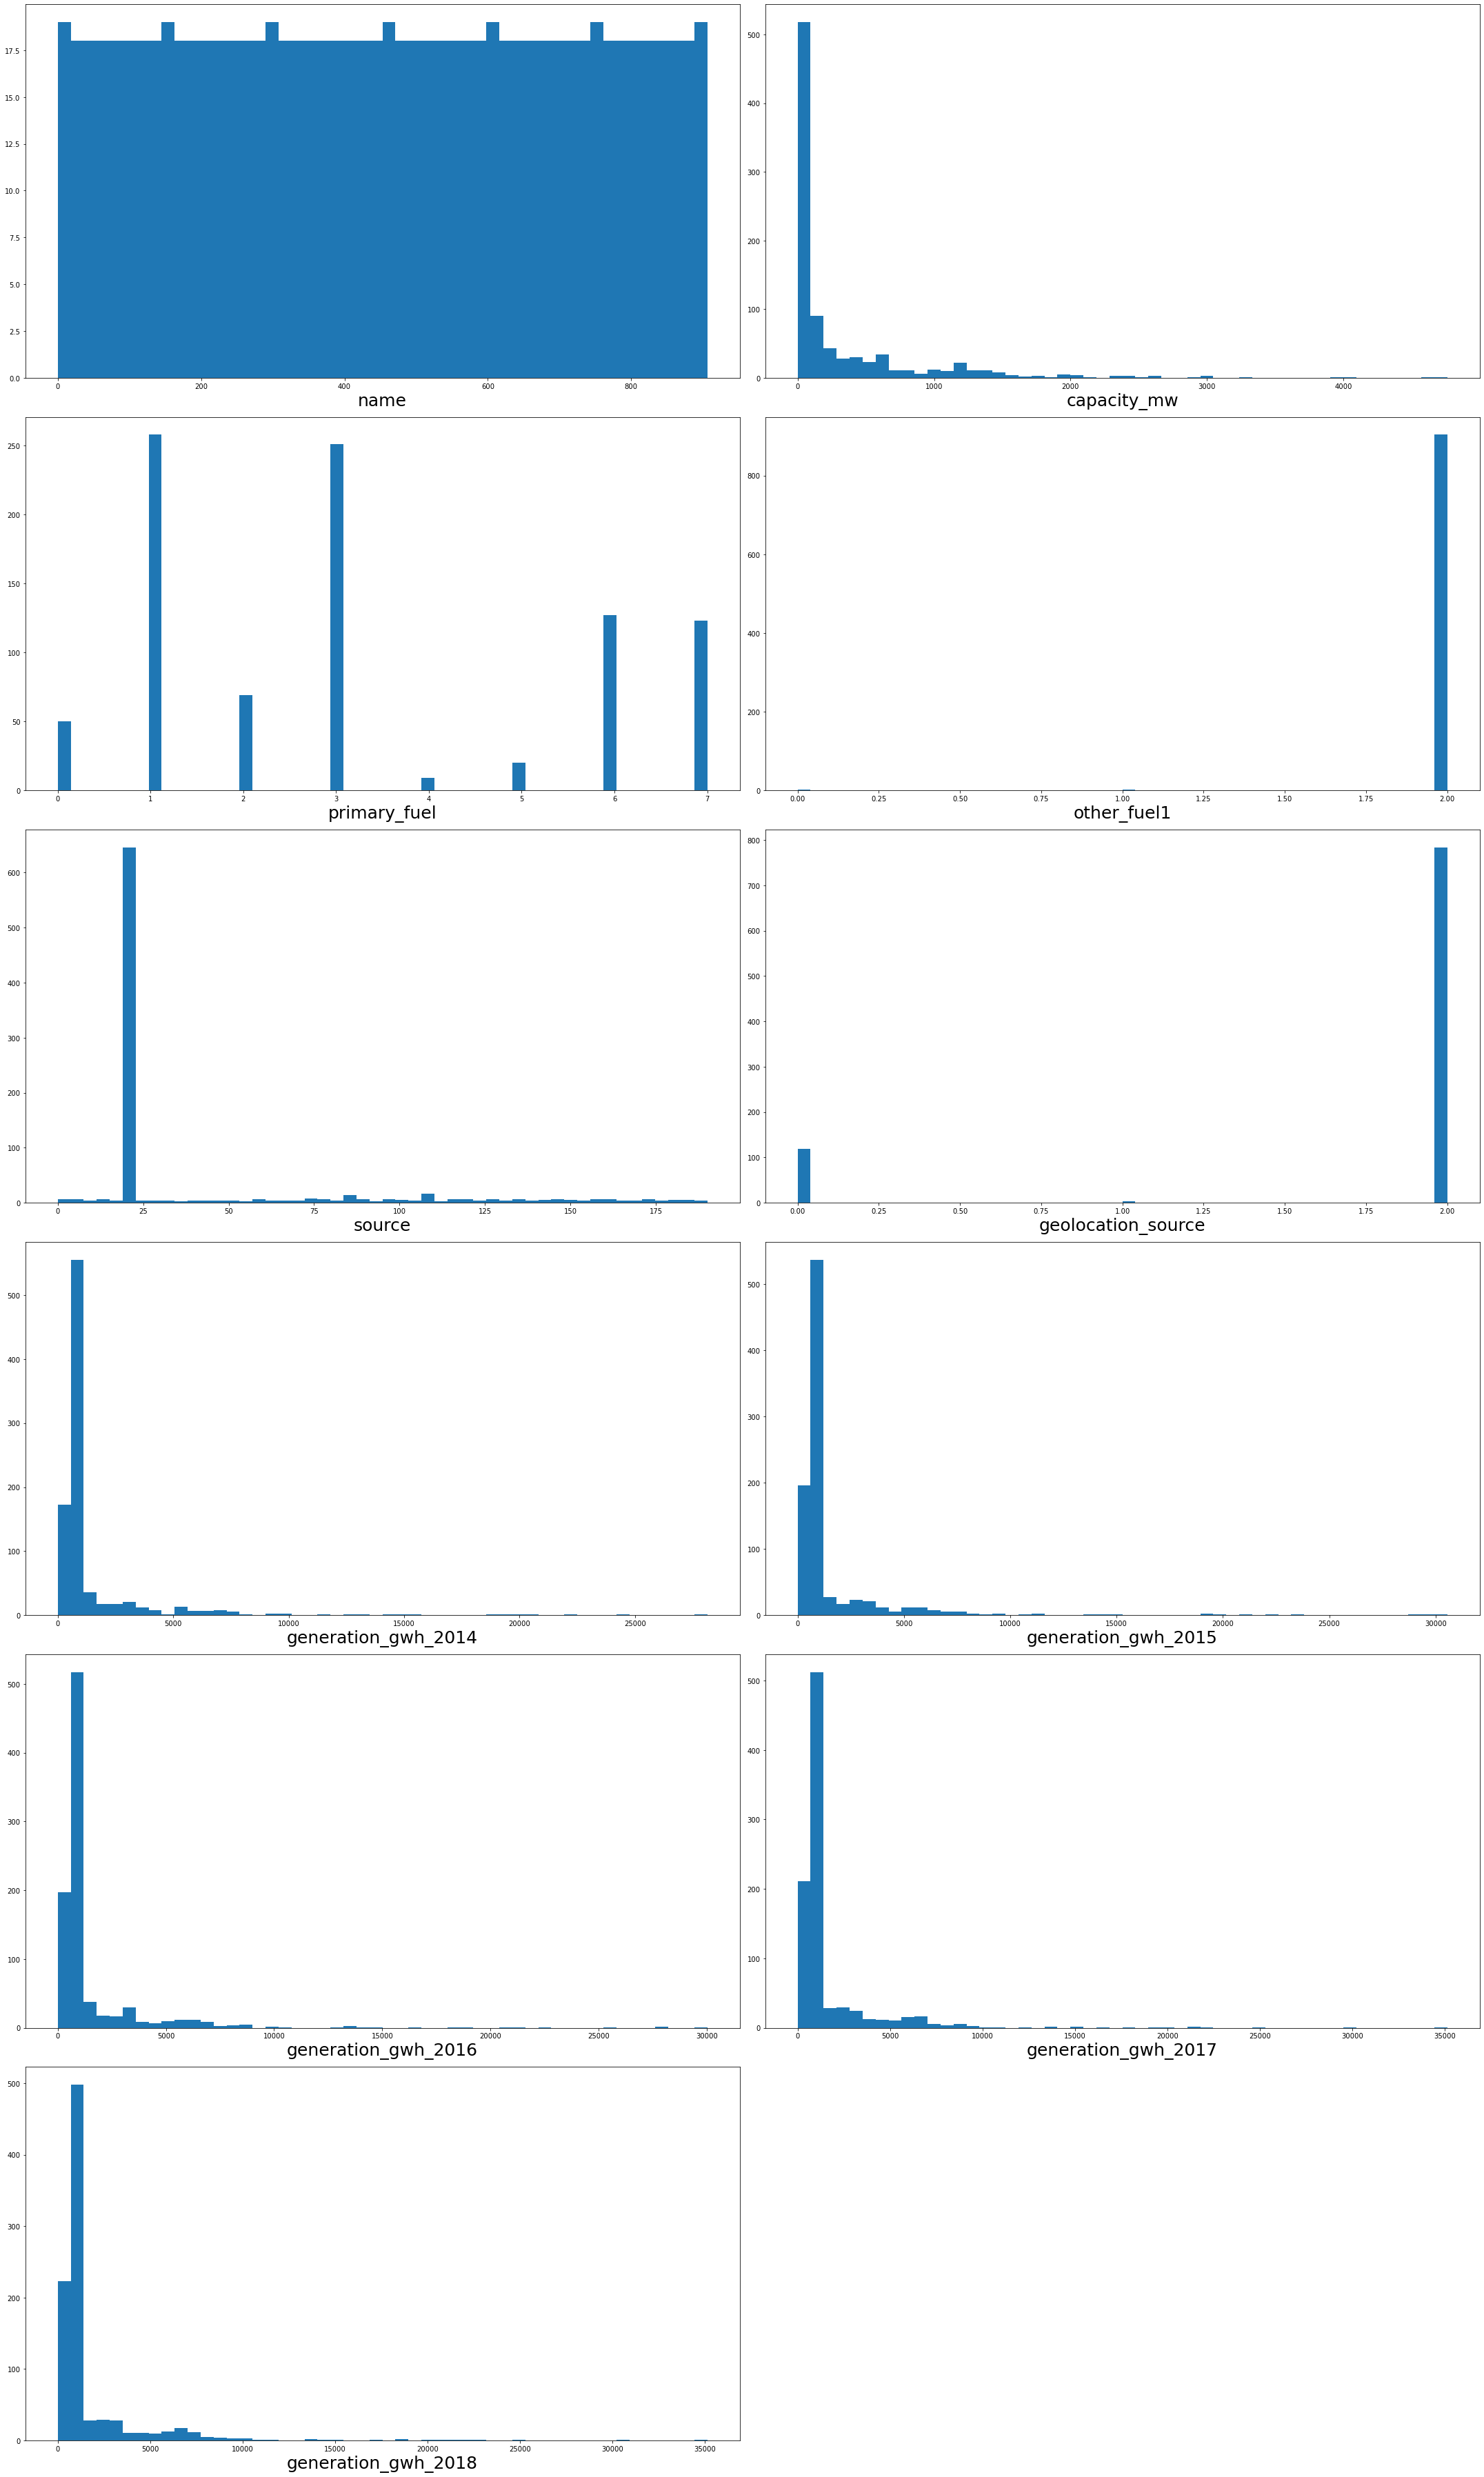

In [237]:
plt.figure(figsize=[30,50])
plotnumber=1
for column in data:
    
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        plt.hist(data[column],bins=50)
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
    plt.tight_layout()
    

In [238]:
data

,name,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,1,98.0,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,2,39.2,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,3,135.0,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,4,1800.0,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,902,1600.0,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000
903,903,3.0,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375
904,904,25.5,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
905,905,80.0,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375


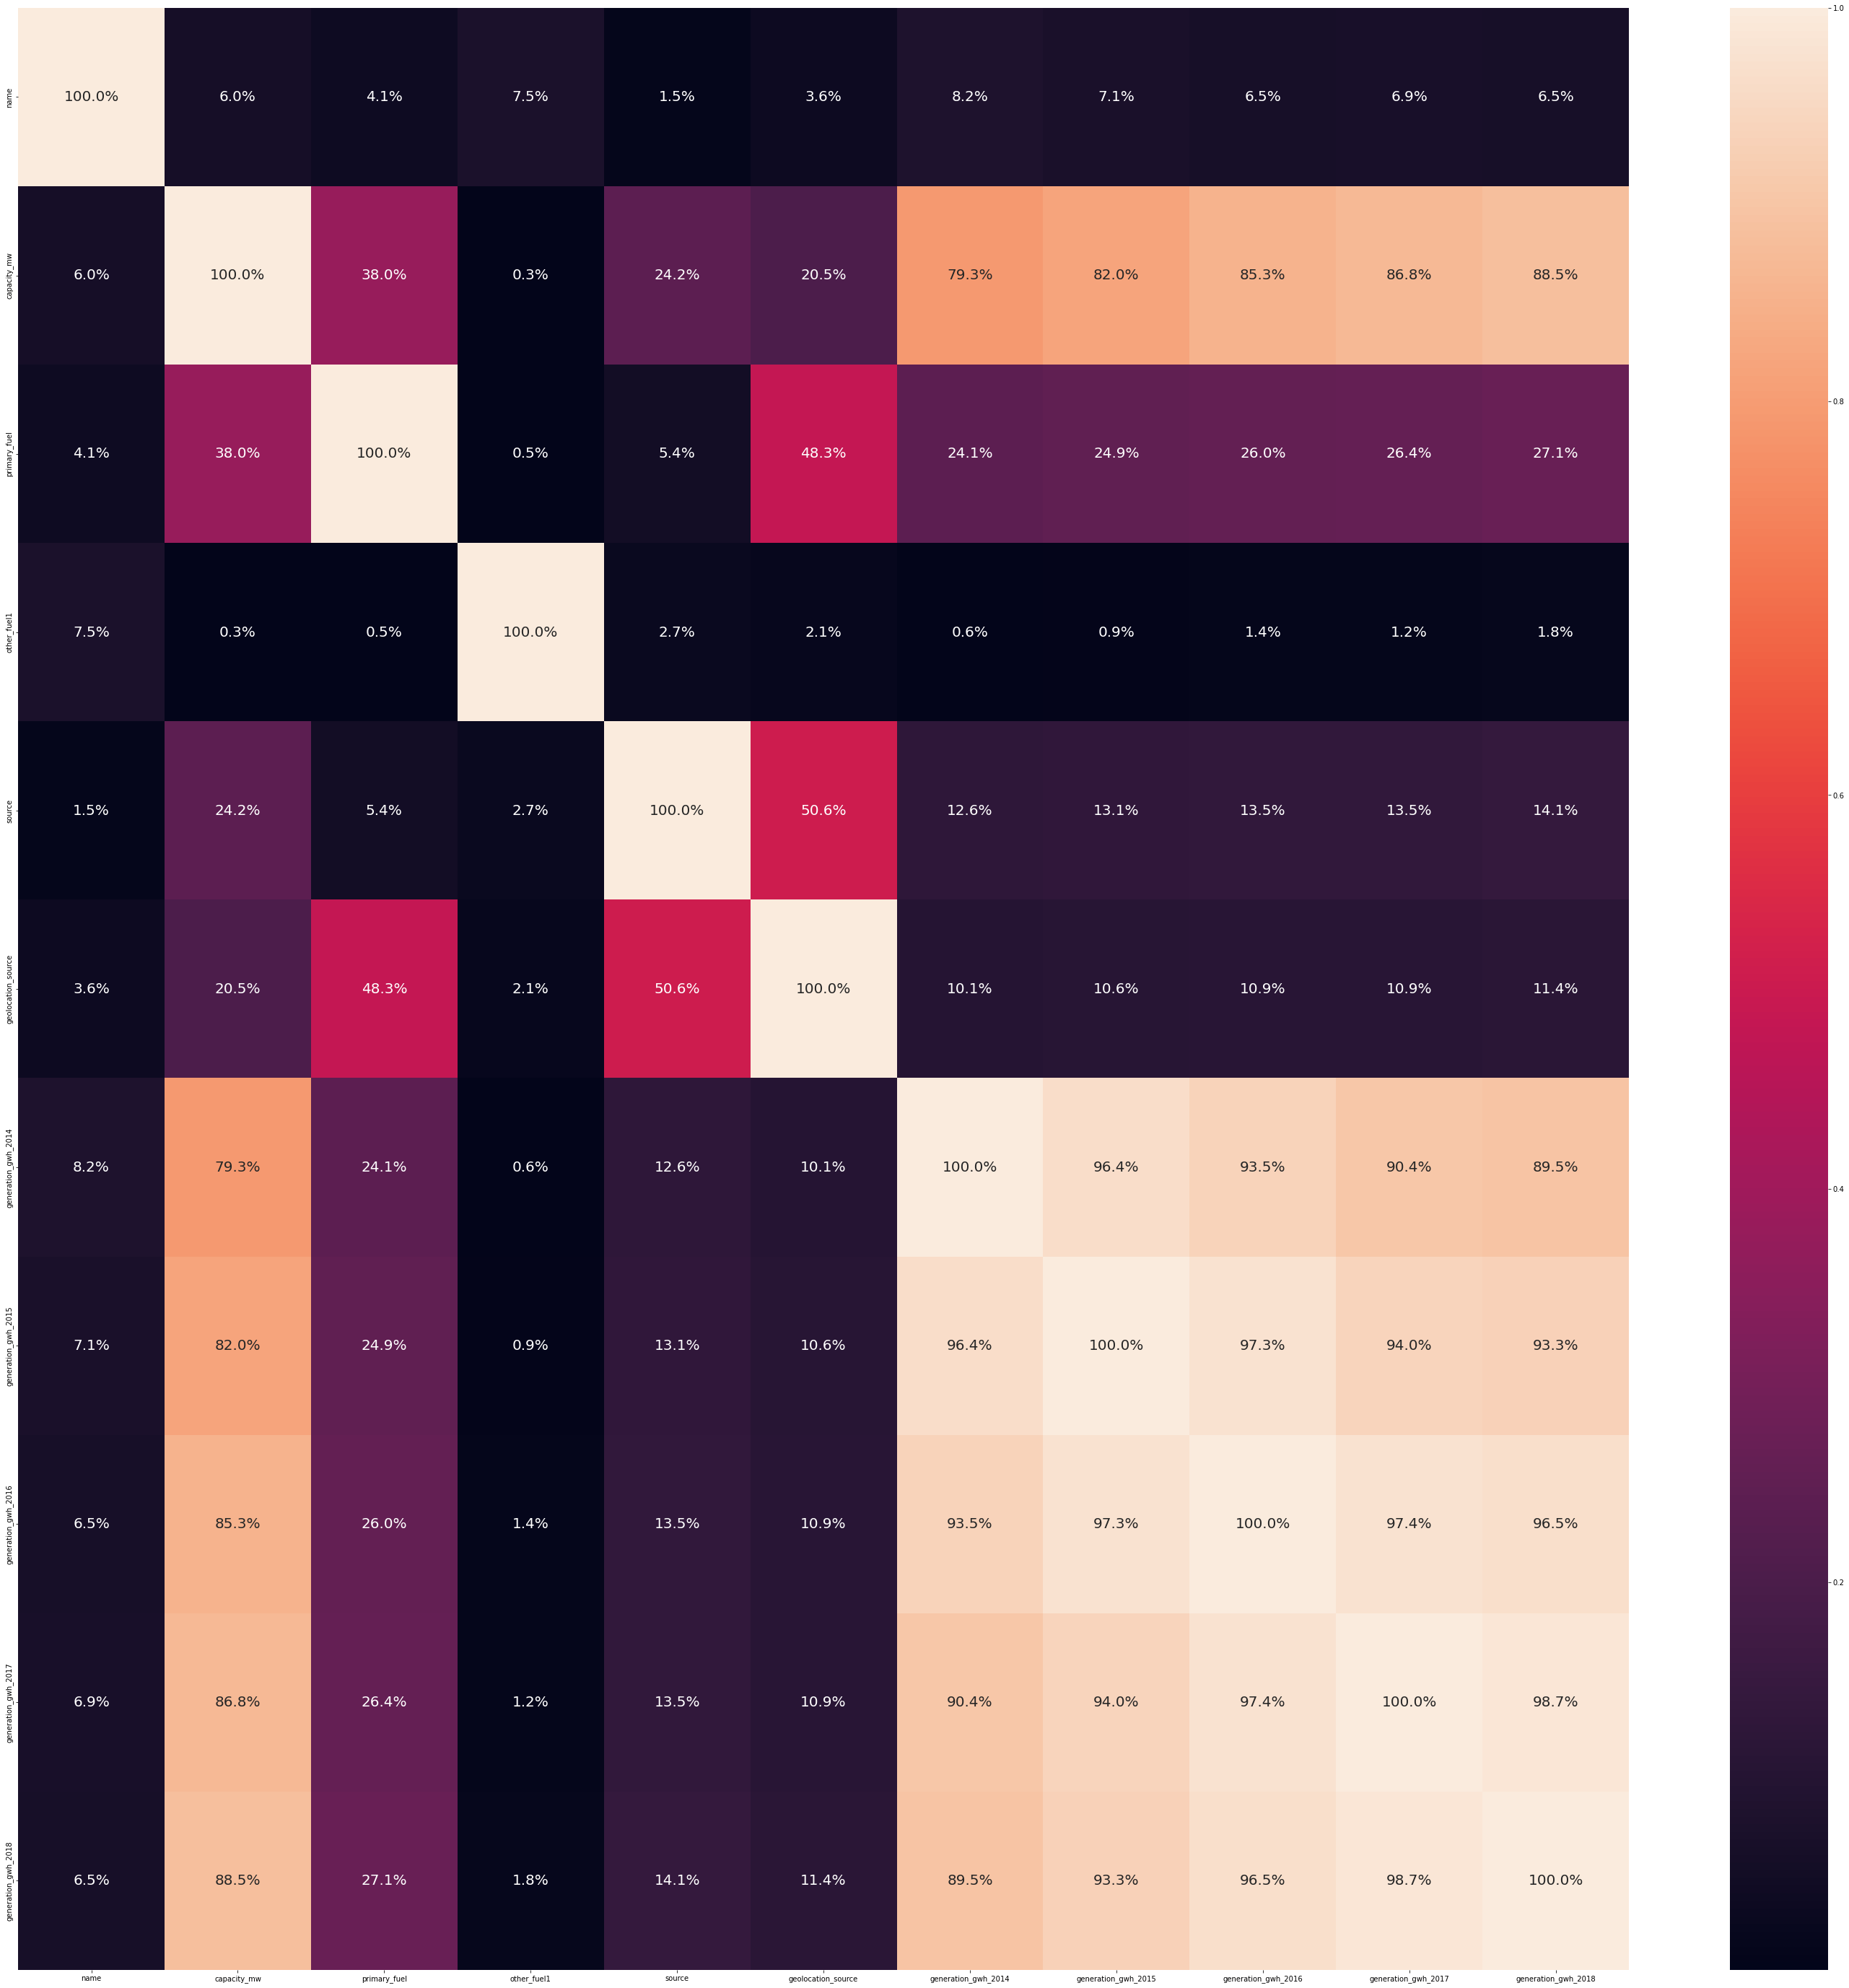

In [239]:
df_corr=data.corr().abs()
plt.figure(figsize=(50,50))
sns.heatmap(df_corr,annot=True,annot_kws={'size':20},fmt='.1%')
plt.show()

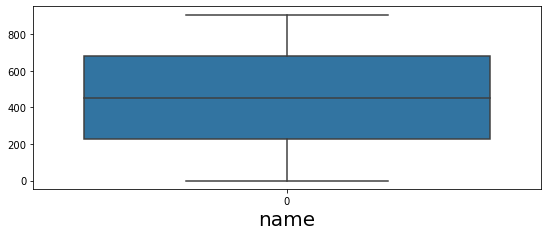

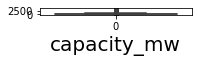

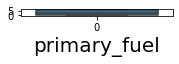

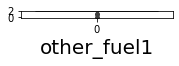

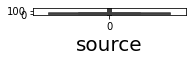

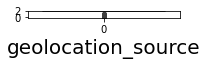

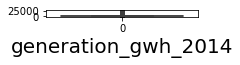

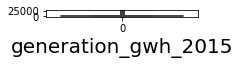

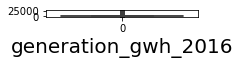

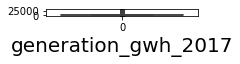

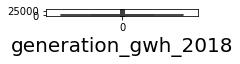

In [240]:
#Lets check for outliers
plt.figure(figsize=(20,100))
graph=1
for column in data:
    if plotnumber<=50:
        ax=plt.subplot(25,2,graph)
        sns.boxplot(data=data[column])
    plt.xlabel(column,fontsize=20)
    graph+=1
    plt.show()

In [241]:
from scipy.stats import zscore
z= np.abs(zscore(data))

In [242]:
threshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
       147, 158, 191, 209, 209, 209, 209, 209, 209, 299, 308, 308, 308,
       308, 308, 308, 321, 345, 363, 364, 364, 364, 364, 364, 364, 375,
       482, 482, 493, 493, 493, 493, 493, 493, 494, 494, 494, 494, 494,
       494, 532, 623, 648, 648, 648, 648, 648, 648, 657, 657, 657, 657,
       657, 657, 661, 669, 689, 695, 695, 695, 695, 695, 695, 721, 721,
       721, 721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726, 726,
       726, 767, 786, 786, 786, 786, 786, 786, 788, 808, 808, 808, 808,
       808, 808, 811, 813, 817, 832, 870, 871, 879, 880, 880, 880, 880,
       880, 880, 895, 900], dtype=int64), array([ 1,  7,  8,  9, 10,  4,  4,  1,  6,  7,  8,  9, 10,  1,  6,  4,  1,
        6,  7,  8,  9, 10,  4,  1,  6,  7,  8,  9, 10,  4,  4,  1,  1,  6,
        7,  8,  9, 10,  1,  1, 10,  1,  6,  7,  8,  9, 10,  1,  6,  7,  8,
        9, 10,  6,  6,  1,  6,  7,  8,  9, 10,  1,  6,  7,  8,  9, 10,  4,
        4

In [243]:
df=data[(z<3).all(axis=1)]
print(data.shape)
print(df.shape)

(907, 11)
(864, 11)


now we have removed teh outliers

In [244]:
data['primary_fuel'].value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

Data is good

## We have to predicts 2 things primary_fuel and capacity_mw so lets predict primary fuel first

In [245]:
# Let us know split our data into Features & labels


x=data.drop('primary_fuel',axis=1)
y=data['primary_fuel']

In [246]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


In [247]:
##Now lets split our data into train_test_split


x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=44)

In [248]:
y_train.value_counts()

3    194
1    194
7     93
6     87
2     54
0     32
5     18
4      8
Name: primary_fuel, dtype: int64

In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [250]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()


In [251]:
#Training of Models starts here

lr.fit(x_train,y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)

print('Training completed')

Training completed


In [252]:
#Lets check tye scores now:

print(lr.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(dt.score(x_test,y_test))
print(rf.score(x_test,y_test))

0.6211453744493393
0.6872246696035242
0.7533039647577092
0.775330396475771


In [253]:
lr_pred = lr.predict(x_test)
knn_pred = knn.predict(x_test)
dt_pred = dt.predict(x_test)
rf_pred = rf.predict(x_test)

In [254]:
print('Logistic Regression:', accuracy_score(y_test,lr_pred))
print('KNN:', accuracy_score(y_test,knn_pred))
print('Decision Tree:', accuracy_score(y_test,dt_pred))
print('Random Forest:', accuracy_score(y_test,rf_pred))

Logistic Regression: 0.6211453744493393
KNN: 0.6872246696035242
Decision Tree: 0.7533039647577092
Random Forest: 0.775330396475771


In [255]:
#Lets do some Hyperparameter tuning using GridSearchAV algorithm

grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(10,20),
    'min_samples_leaf':range(2,15),
    'min_samples_split':range(2,10),
    'max_leaf_nodes':range(2,5)
}

In [256]:
grid_search=GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,n_jobs=-1)


In [257]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 20),
                         'max_leaf_nodes': range(2, 5),
                         'min_samples_leaf': range(2, 15),
                         'min_samples_split': range(2, 10)})

In [258]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [259]:
dec_tree=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=10,min_samples_split=3,max_depth=20,min_samples_leaf=4)
r_f=RandomForestClassifier(criterion='gini',max_leaf_nodes=3,min_samples_split=2,max_depth=10,min_samples_leaf=2)

In [260]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=20, max_leaf_nodes=10, min_samples_leaf=4,
                       min_samples_split=3)

In [261]:
r_f.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_leaf_nodes=3, min_samples_leaf=2)

In [262]:
y1_pred=dec_tree.predict(x_test)
y2_pred=r_f.predict(x_test)

In [263]:
accuracy_score(y_test,y2_pred)

0.6607929515418502

In [264]:
#Let's save our model for future use

filename='GPPD_fuel.pickle'
pickle.dump(dec_tree,open(filename,'wb'))

# CAPACITY_MW

In [265]:
## split data into features & labels


p=data.drop('capacity_mw',axis=1)
q=data['capacity_mw']

In [266]:
scaler=StandardScaler()
p_scaled=scaler.fit_transform(p)

In [267]:
#Split the data into train_test_split

p_train,p_test,q_train,q_test=train_test_split(p_scaled,q,test_size=0.25,random_state=44)

In [274]:

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [276]:
lr=LinearRegression()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
gbdt=GradientBoostingRegressor()


In [277]:
#Training of Models


lr.fit(p_train,q_train)
print('Training Completed')

Training Completed


In [279]:
knn.fit(p_train,q_train)

KNeighborsRegressor()

In [281]:
dt.fit(p_train,q_train)

DecisionTreeRegressor()

In [282]:
rf.fit(p_train,q_train)

RandomForestRegressor()

In [283]:
gbdt.fit(p_train,q_train)

GradientBoostingRegressor()

In [284]:
#Checking the scores(TRAIN)

print(lr.score(p_train,q_train))
print(knn.score(p_train,q_train))
print(dt.score(p_train,q_train))
print(rf.score(p_train,q_train))
print(gbdt.score(p_train,q_train))

0.8109416857788836
0.8666184000381727
1.0
0.97968588401299
0.9613224182633996


In [285]:
#Checking the scores(TEST)

print(lr.score(p_test,q_test))
print(knn.score(p_test,q_test))
print(dt.score(p_test,q_test))
print(rf.score(p_test,q_test))
print(gbdt.score(p_test,q_test))

0.8394985180601919
0.876194163434094
0.7916625397505532
0.9038302708967908
0.8757013965673642


In [286]:
##SAVING THE MODEL NOW

filename='Global_PPD_capacity.pickle'
pickle.dump(rf,open(filename,'wb'))